# <div style="text-align: center"> Introducción a la Ciencia de Datos </div>


** <div style="text-align: right"> Fabricio Loor </div>**


<h1 style="font-size:20px;background-color: #aaa;
            padding: 10px;">Librerias necesarias</h1> 

In [2]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact
import seaborn as sns

plt.style.use('seaborn-darkgrid')

<h1 style="font-size:20px;background-color: #aaa;
            padding: 10px;">Cargamos la BD</h1> 

In [3]:
dataf = pd.read_csv('PrecioAutosAbril2018.csv',sep=';')

In [4]:
dataf.head()

,MARCA,MODELO,VERSIÓN,0 Km,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,AGRALE,MARRUA,D/C 2.8 AM 100 4X4,NaN,NaN,683.0,612.0,551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGRALE,MARRUA,D/C 2.8 AM 150 4X4,NaN,NaN,777.0,694.0,625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGRALE,MARRUA,D/C 2.8 AM 200 4X4,NaN,NaN,836.0,753.0,678.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALFA ROMEO,147,5P 2.0 TS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.0,158.0,NaN,NaN
4,ALFA ROMEO,147,5P 2.0 TS FULL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,174.0,NaN,NaN


<h1 style="font-size:20px;background-color: #aaa;
            padding: 10px;">Seleccionamos un modelo</h1> 

In [5]:
modelos = dataf.groupby('MODELO')
x_modelos =list( modelos.groups.keys())
print(x_modelos)

['118', '120', '125', '130', '135', '147', '1500 PICK - UP', '156', '159', '166', '2008', '206', '207', '208', '220i', '235i', '25', '2500 PICK - UP', '3', '300', '3008', '301', '307', '308', '316', '318', '320', '320i', '323', '325', '328', '330', '335', '4', '4008', '406', '407', '408', '430', '430i', '435', '440', '45', '500', '500 L', '500 X', '5008', '501 L', '508', '515', '525', '528', '530', '535', '535i', '540', '540i', '545', '550', '607', '640', '640i', '645', '650', '650 i', '651 i', '745', '75', '750', '750i', '807', '86', '9.3', '9.5', '911', 'A 160', 'A 190', 'A 200', 'A 250', 'A 45', 'A1', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'ACCENT', 'ACCORD', 'ACTYON', 'AFALINA', 'AGILE', 'ALHAMBRA', 'ALLROAD', 'ALTEA', 'ALTIMA', 'AMAROK PICK - UP', 'APRIL', 'ARGO', 'ARRIZO 5', 'ASTRA', 'ATOS', 'AUGUST', 'AVALANCHE', 'AVENSIS', 'AVEO', 'B 170', 'B 180', 'B 200', 'B 2500 PICK - UP', 'BERLINGO', 'BLAZER', 'BORA', 'BOXER', 'BOXSTER', 'BRAVO', 'BRERA', 'C 15', 'C 200', 'C 220', 'C 230', 'C

In [6]:
x = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
y = dataf[dataf['MODELO'] == 'PRISMA'][dataf.columns[3:18]].values

<h1 style="font-size:20px;background-color: #aaa;
            padding: 10px;">¿Cuál será el valor para un determinado modelo para un año X?</h1> 

$173.0


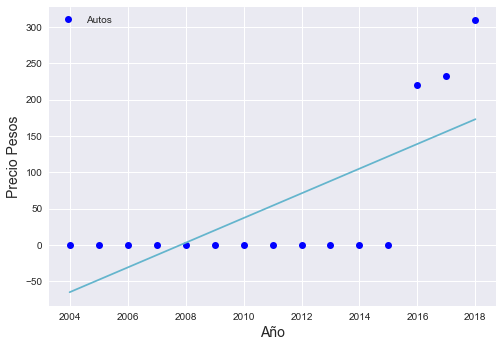

In [7]:
y1 = y[7][::-1]
y1[np.isnan(y1)] = 0

y2 = range(1,16)
res = stats.linregress(y2, y1)

ordenada = np.round(res.intercept)
pendiente = np.round(res.slope)

#Valor en un determiando Año
anio = 2019
anio -= 2004
valor = anio*pendiente  + ordenada
print('${0}'.format(valor))
plt.plot(x, y1, 'o', color='blue', label="Autos" );
plt.plot(x,  ordenada  +   pendiente * y2, color='C5');
plt.ylabel("Precio Pesos", fontsize=14);
plt.xlabel("Año", fontsize=14);
plt.legend();

<h1 style="font-size:20px;background-color: #aaa;
            padding: 10px;">¿Qué auto tuvo la mayor tasa de crecimiento de su precio [2004,2017]?</h1> 

In [8]:
#Calcular que auto tuvo la mayor valoración Sin tener en cuenta el último año
pendiente_max = 0
fila=0
for row in dataf.itertuples():
    y = row[5:19]
    y1 = np.array(y[::-1])
    y1[np.isnan(y1)] = 0
    y2 = range(1,15)
    pendiente = stats.linregress(y2, y1).slope
    if(pendiente > pendiente_max):
        fila = row.Index
        pendiente_max = pendiente
        
print(dataf.loc[fila])
print("Pendiente: "+str(pendiente_max))

MARCA                       MERCEDES BENZ
MODELO                  MERCEDES-AMG GT s
VERSIÓN    GT-COUPE 4.0 V8 BITURBO CARBON
0 Km                                  300
2017                                 4413
2016                                 4141
2015                                 3727
2014                                  NaN
2013                                  NaN
2012                                  NaN
2011                                  NaN
2010                                  NaN
2009                                  NaN
2008                                  NaN
2007                                  NaN
2006                                  NaN
2005                                  NaN
2004                                  NaN
Name: 3259, dtype: object
Pendiente: 299.918681319


<img src="M.jpg">

<h1 style="font-size:20px;background-color: #aaa;
            padding: 10px;">Pasamos los valores de los autos que están en dolares a pesos</h1> 

In [9]:
dolares = ['ALFA ROMEO', 'AUDI', 'BAIC', 'BMW', 'CAMARO SS', 'DODGE', 'DS', 'KUGA MUSTANG', 'S-MAX', 'FOTON', 'EMGRAND GS', 'EMGRAND X7', 'CIVIC 1,5 EXT', 'HYUNDAI', 'JAGUAR', 'JEEP', 'KIA', 'LAND ROVER', 'LOTUS', 'MASERATI', 'MERCEDES BENZ', 'MINI COOPER', 'PORSCHE', 'RAM', 'SMART', 'SUBARU', 'SUZUKI', 'GOLF GTI', 'SCIROCCO', 'PASSAT ', 'THE BEETLE', 'TOUAREG ', 'VENTO GLI', 'VOLVO']
marcas = 'ALFA ROMEO|AUDI|BAIC|BMW|CAMARO SS|DODGE|DS|KUGA|MUSTANG|S-MAX|FOTON|EMGRAND GS|EMGRAND X7|CIVIC 1,5 EXT|HYUNDAI|JAGUAR|JEEP|KIA|LAND ROVER|LOTUS|MASERATI|MERCEDES BENZ|MINI COOPER|PORSCHE|RAM|SMART|SUBARU|SUZUKI|GOLF GTI|SCIROCCO|PASSAT|THE BEETLE|TOUAREG|VENTO GLI|VOLVO'

dataf_pesos = dataf.copy()
dolar = 25
a = dataf_pesos['MARCA'].str.contains(marcas)
it = 0
for row in a:
    if(row and not np.isnan(dataf_pesos.xs(it)['0 Km'])):
        dataf_pesos.set_value(it, '0 Km', dataf_pesos.xs(it)['0 Km'] * dolar)            
    it+=1
dataf_pesos
#dataf_pesos[dataf_pesos['MODELO'] == 'MONDEO']

,MARCA,MODELO,VERSIÓN,0 Km,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,AGRALE,MARRUA,D/C 2.8 AM 100 4X4,NaN,NaN,683.0,612.0,551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGRALE,MARRUA,D/C 2.8 AM 150 4X4,NaN,NaN,777.0,694.0,625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGRALE,MARRUA,D/C 2.8 AM 200 4X4,NaN,NaN,836.0,753.0,678.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALFA ROMEO,147,5P 2.0 TS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.0,158.0,NaN,NaN
4,ALFA ROMEO,147,5P 2.0 TS FULL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,174.0,NaN,NaN
5,ALFA ROMEO,147,5P 2.0 TS S-SPEED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188.0,182.0,175.0,169.0
6,ALFA ROMEO,147,5P 1.9 JTD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.0,140.0
7,ALFA ROMEO,147,5P 1.9 JTD FULL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0,146.0
8,ALFA ROMEO,147,3P 1.6 TS 120CV PROGRESSION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0,163.0,157.0,150.0,145.0,140.0
9,ALFA ROMEO,147,5P 1.6 TS 120CV PROGRESSION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.0,166.0,160.0,153.0,148.0,143.0


<h1 style="font-size:20px;background-color: #aaa;
            padding: 10px;">¿Qué auto tuvo la mayor tasa de crecimiento de su precio [2004,2018]?</h1> 

In [10]:
#Calcular que auto tuvo la mayor valoración Teniendo en cuenta el último año
pendiente_max = 0
fila=0
for row in dataf_pesos.itertuples():
    y = row[4:19]
    y1 = np.array(y[::-1])
    y1[np.isnan(y1)] = 0
    y2 = range(1,16)
    pendiente = stats.linregress(y2, y1).slope
    if(pendiente > pendiente_max):
        fila = row.Index
        pendiente_max = pendiente
        
print(dataf_pesos.loc[fila])
print("Pendiente: "+str(pendiente_max))

MARCA                PORSCHE
MODELO                   911
VERSIÓN    CONV TURBO S 2017
0 Km                   13750
2017                    8090
2016                     NaN
2015                     NaN
2014                     NaN
2013                     NaN
2012                     NaN
2011                     NaN
2010                     NaN
2009                     NaN
2008                     NaN
2007                     NaN
2006                     NaN
2005                     NaN
2004                     NaN
Name: 4114, dtype: object
Pendiente: 517.107142857


<img src="p.jpg">

<h1 style="font-size:20px;background-color: #aaa;
            padding: 10px;">Graficando precios de acuerdo a marcas</h1> 

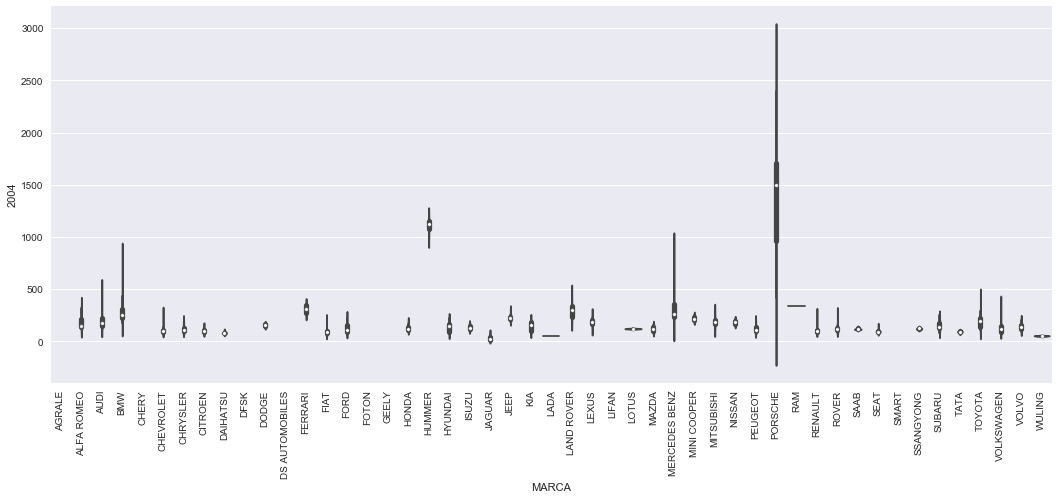

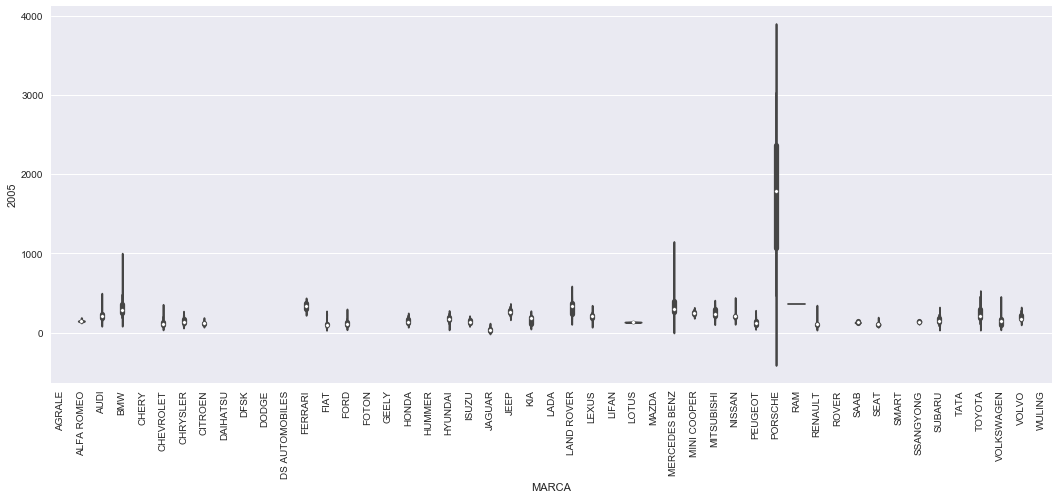

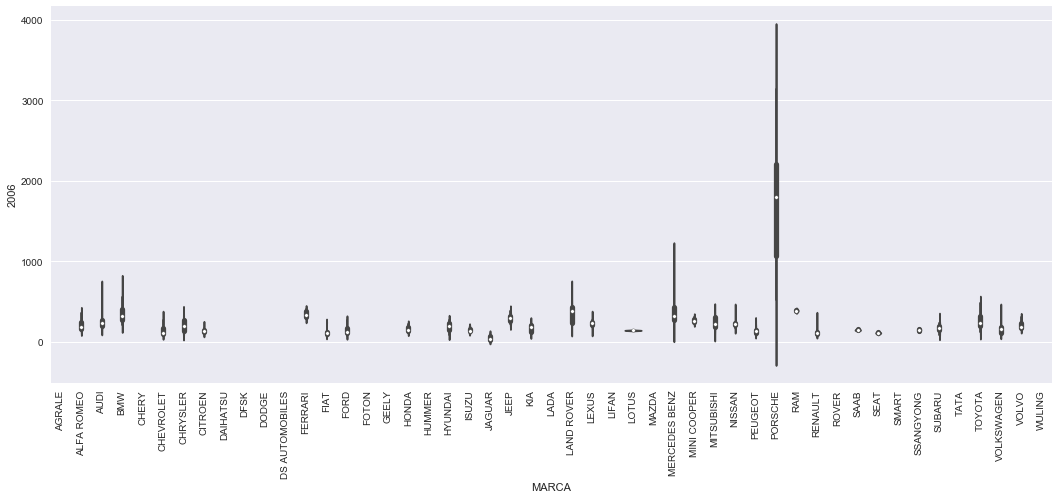

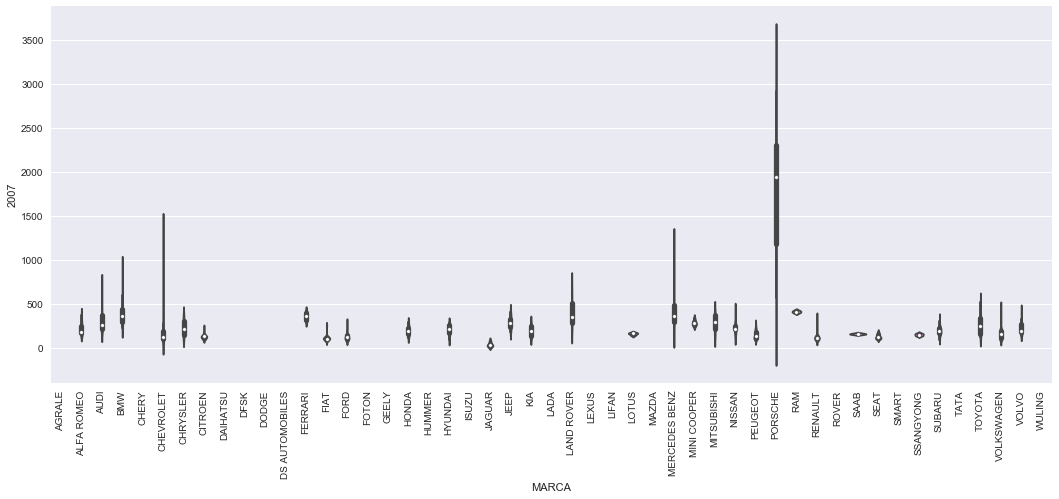

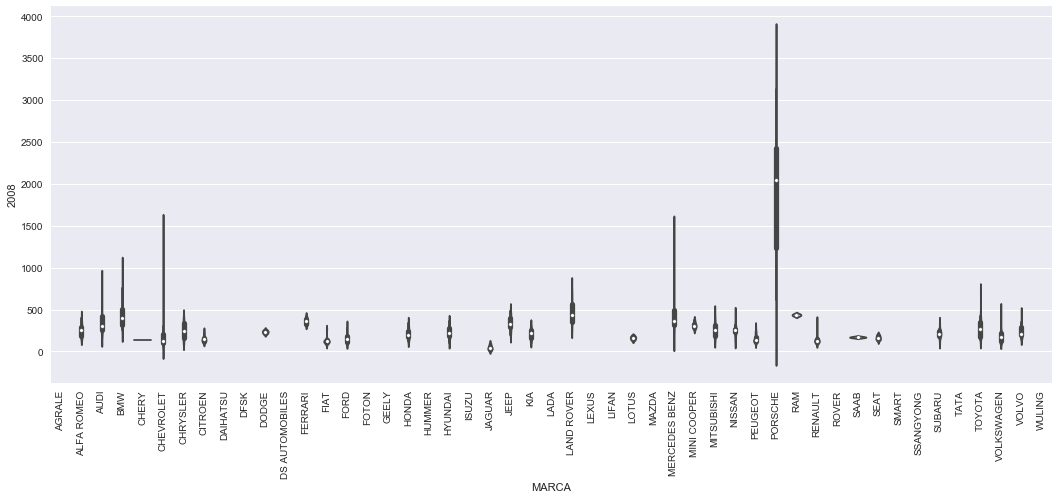

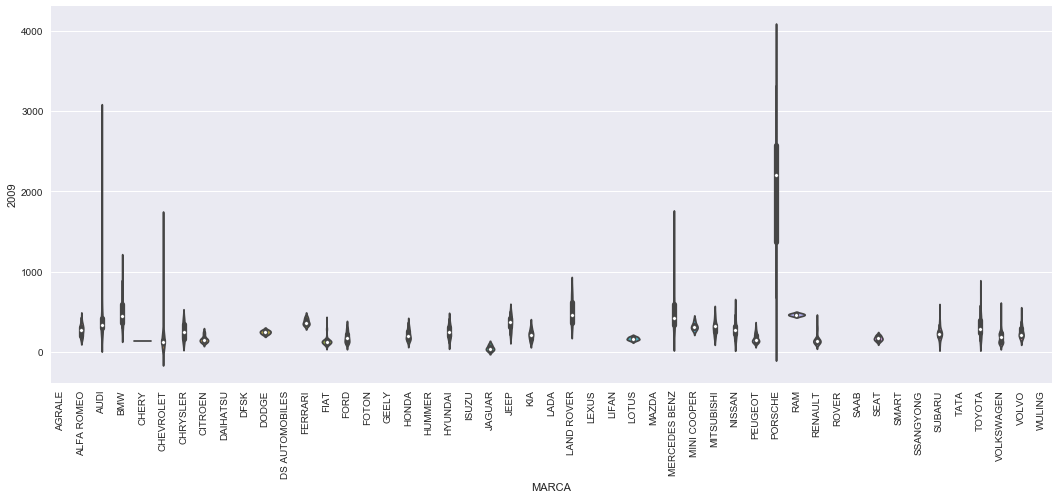

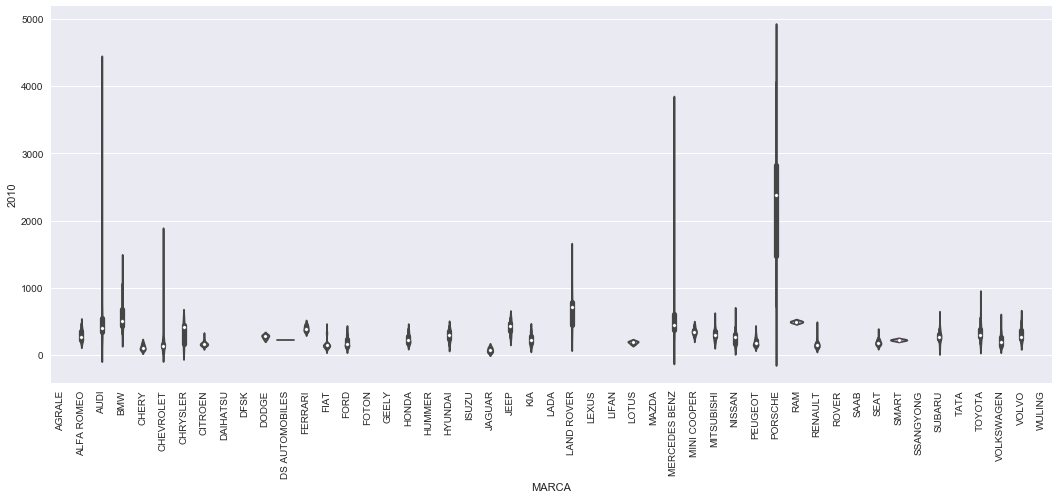

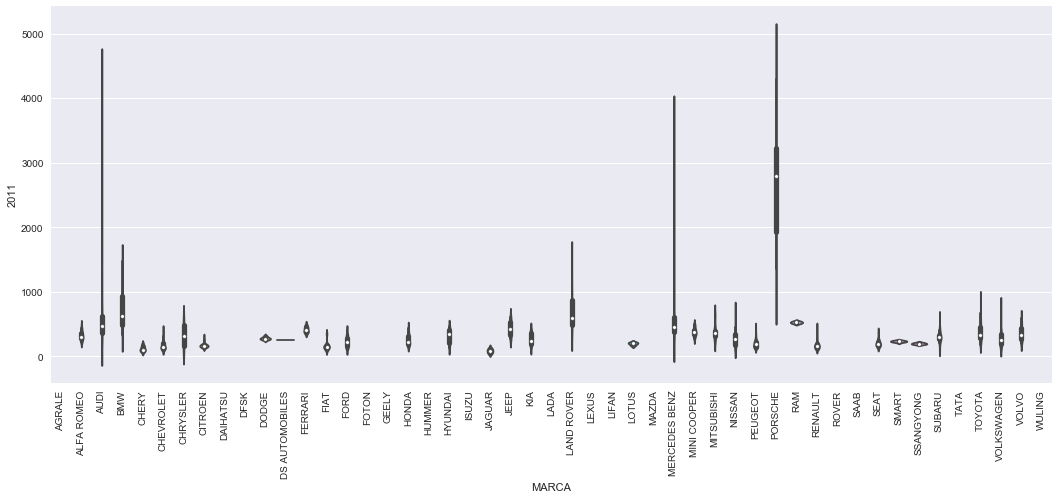

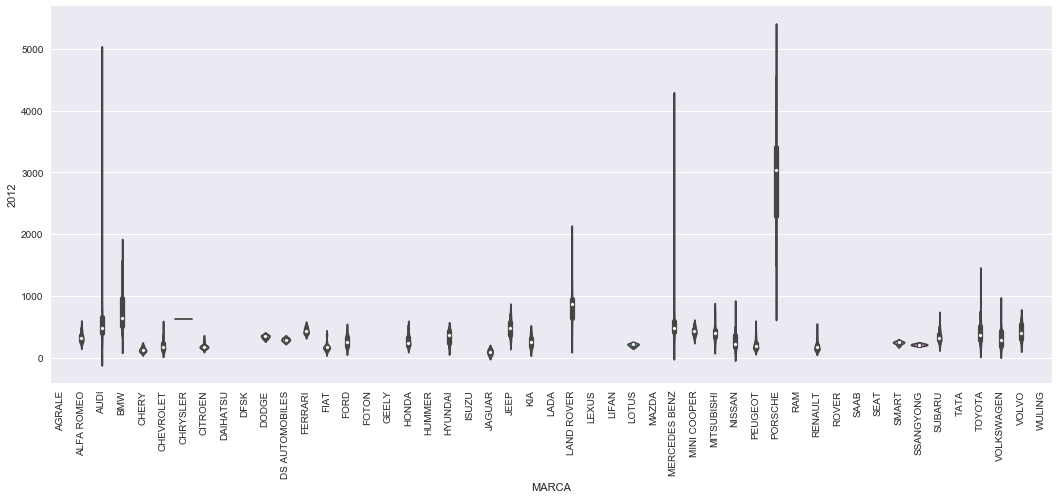

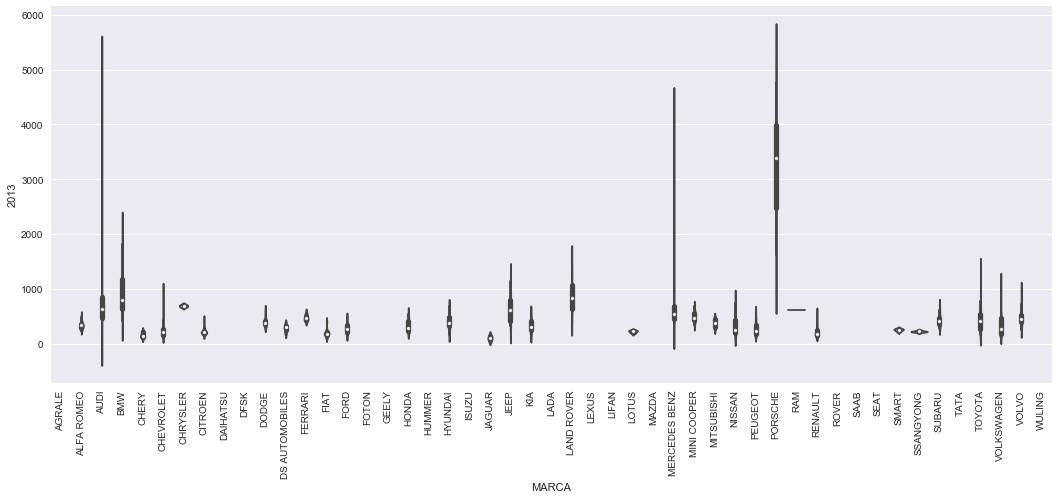

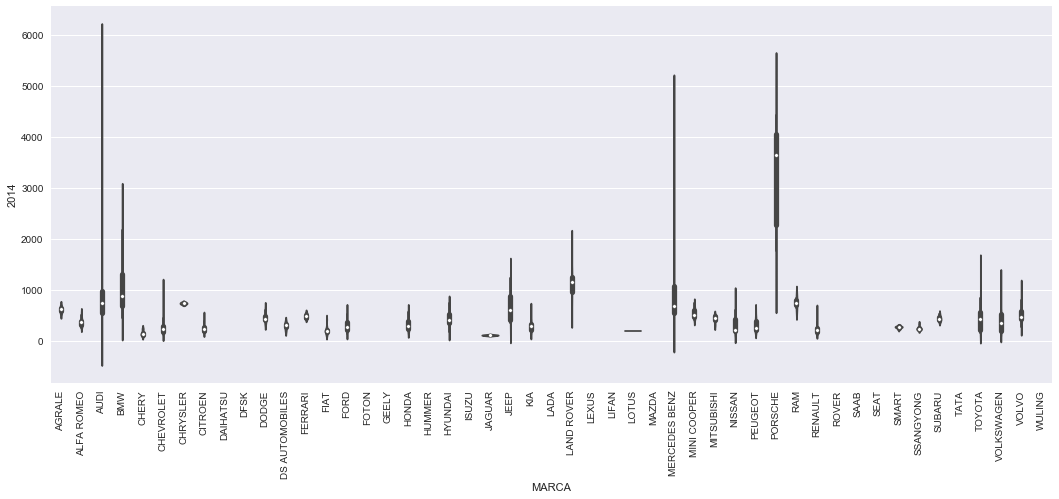

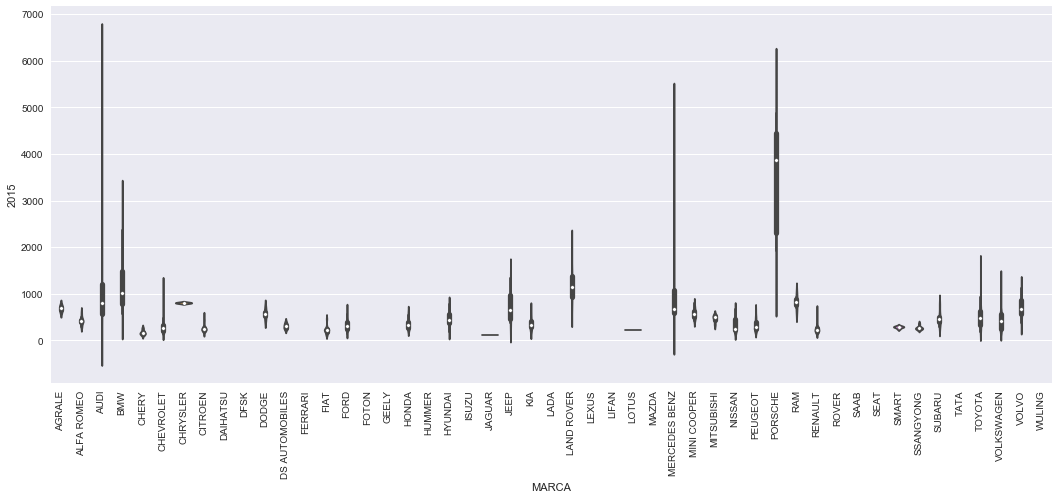

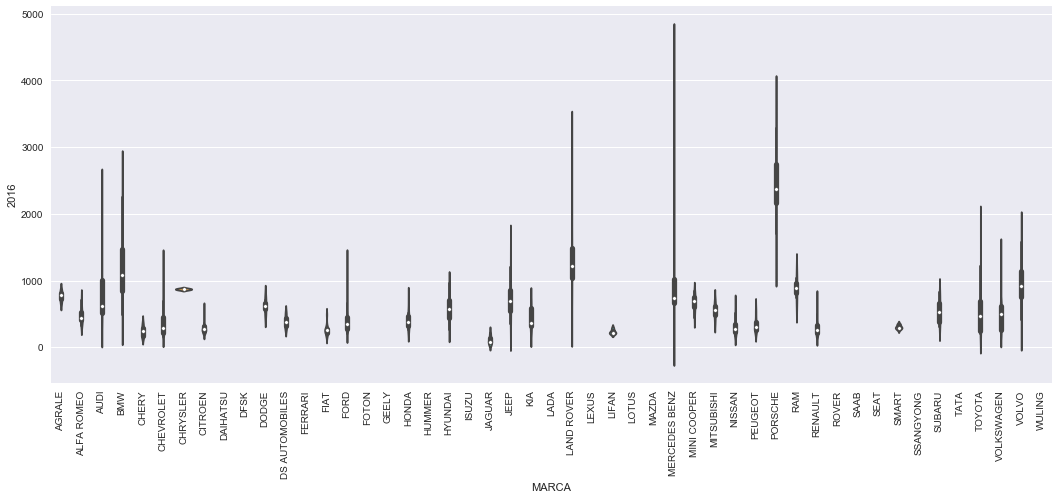

In [59]:
grupo = dataf_pesos.groupby('MARCA')
x_marcas =list( grupo.groups.keys())
# grupo.groups.keys()
# grupo[grupo.columns[1:1]].head()
# dataf_pesos.[np.isnan(dataf_pesos)] = 0
dataf_pesos.fillna(0)
for i in range(2004,2017):
    g = sns.factorplot(x="MARCA", y=str(i), data=dataf_pesos,kind="violin",size=6, aspect=2.5)
    g.set_xticklabels(rotation=90) 
#dataf_pesos[dataf_pesos['MARCA'] == 'PORSCHE']

C:\Users\LenovoF\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


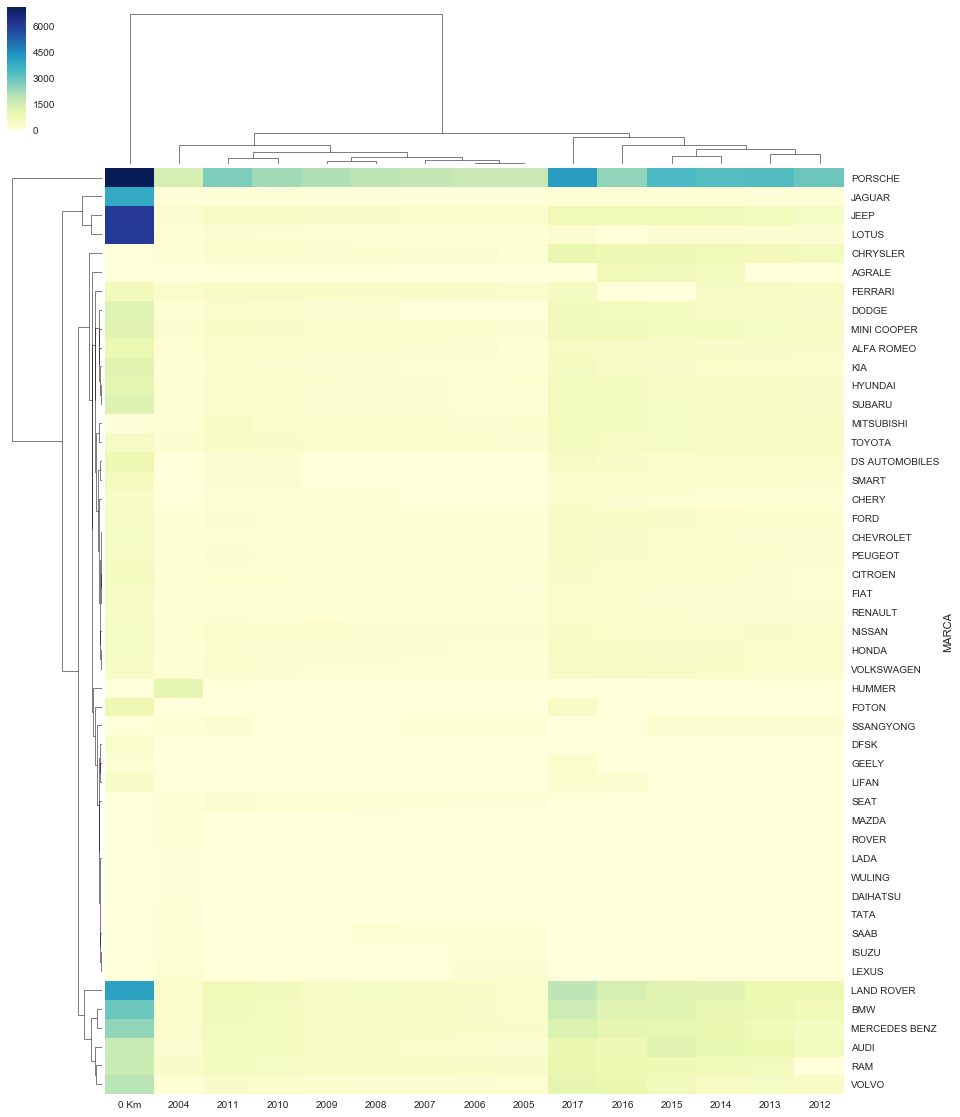

In [56]:
sns.set()
# Create a categorical palette to identify the networks
da2 = dataf_pesos.copy()
da2.pop("MODELO")
da2.pop("VERSIÓN")
da2 = da2.groupby('MARCA').mean()
da2[np.isnan(da2)] = 0
cg = sns.clustermap(da2,figsize=(15, 20), col_cluster = True,  row_cluster = True, cmap="YlGnBu")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
# plt.setp(cg.dendrogram_col.reordered_ind(), da2.reindex_axis(sorted(da2.columns, reverse=False), axis=1))
plt.show();

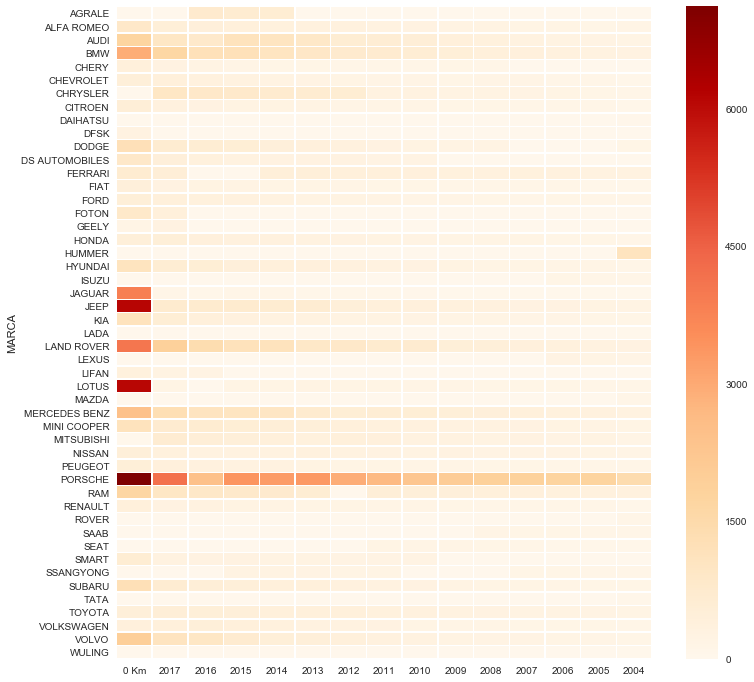

In [57]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(da2, cmap='OrRd', linewidths=.5)